In [308]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [309]:
temps  = np.linspace(1,600,600)       # secondes
P_atm  = 1.01325*10**5                # Pascales
T_amb  = 293.0                        # Kelvines
R      = 276.                         # J K-1 mol-1
rho    = 1.293                        # Kg m3
kb     = 1.380649*10**(-23)      
gamma  = 72.8*10**(-3)                # N m
Cm     = 1.013*10**3                  # J Kg-1 K-1
a      = 2*10**(-2)                   # m
b      = 6*10**(-2)                   # m
hi     = 9.1                          # W m-2 K-1 

V       = a*2*3.1415*b**2             # m3
S       = 2*3.1415*b**2+a*3.1415*2*b  # m2

#------------------- condition initale ---------------------#

T_i     = 323         # Kelvin
h       = 10**(-3)  # Mètre


r =  [0.00897025]


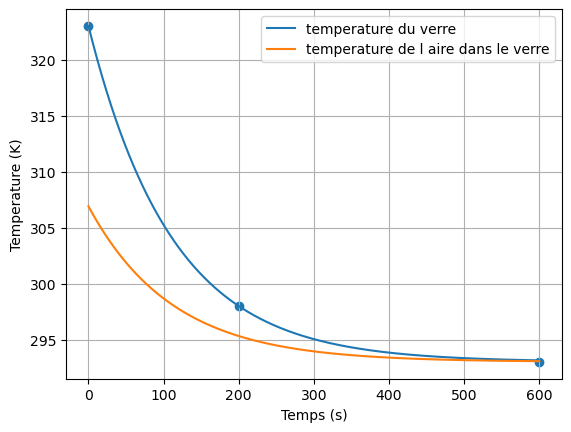

In [310]:
#temps_expe = [0,600]
#temperature_expe = [50+273,T_amb]

temps_expe = [0,200,600]
temperature_expe = [50+273,25+273,T_amb]


def loi_refroidisement(t,r):
    return T_amb + (50+273-T_amb)*np.exp(-r*t)

def echage_chaleure(T_aire,T_verre):
    return T_aire + hi*S*(T_verre-T_aire)/(Cm*rho*V)

popt, pcov = curve_fit(loi_refroidisement, temps_expe, temperature_expe, p0=[0.01])

r = popt

temps_model = []
for i in range(601):
    temps_model.append(i)

temperature_model = loi_refroidisement(temps_model, r)

print('r = ',r)

temperature_aire_verre = []
temperature_aire_verre.append(T_amb)


temperature_aire_verre = echage_chaleure(T_amb,temperature_model)



plt.scatter(temps_expe,temperature_expe)
plt.plot(temps_model,temperature_model, label='temperature du verre')
plt.plot(temps_model,temperature_aire_verre, label = 'temperature de l aire dans le verre')
plt.grid()
plt.legend()
plt.xlabel("Temps (s)")
plt.ylabel("Temperature (K)")
plt.show()


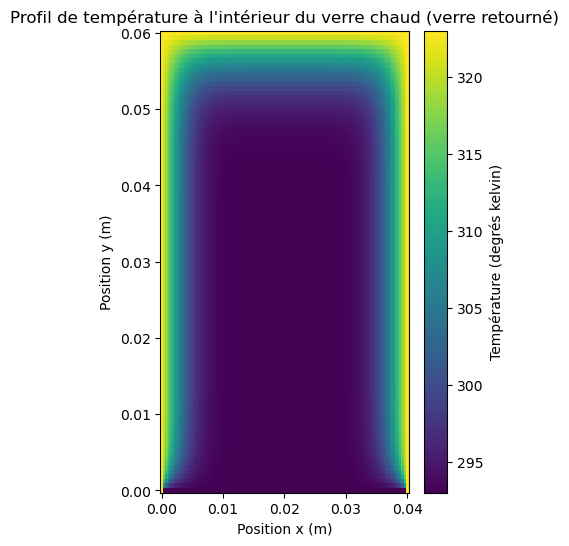

In [377]:
# Paramètres du problème
L = 2*a  # Longueur du verre en mètres
T_initial = 20.0 + 273  # Température initiale en degrés Celsius
T_hot = 50.0 + 273  # Température du verre chaud en degrés Celsius
alpha = 20 * 10**(-6)  # Coefficient de diffusion de la chaleur en m2 s-1

# Discrétisation de l'espace
Nx = 100  # Nombre de points dans la direction x
Ny = 100  # Nombre de points dans la direction y
dx = L / (Nx - 1)  # Espacement entre les points dans la direction x
dy = b / (Ny - 1)  # Espacement entre les points dans la direction y
dx = dy = min(dx, dy)

# Discrétisation du temps
Nt = 6000  # Nombre d'itérations temporelles
dt = 0.00006  # Pas de temps

# Initialisation du profil de température
T = np.ones((Nx, Ny)) * T_initial

# Conditions aux limites
T[:, 0] = T_hot  # Le fond du verre réchauffe l'air
T[:, Nx-1] = T_hot
T[Ny-1, :] = T_hot

# Simulation de la diffusion de la chaleur
for t in range(Nt):
    # Mise à jour de la température en utilisant l'équation de la chaleur discrétisée en 2D
    T[1:-1, 1:-1] = T[1:-1, 1:-1] + alpha * dt / dx**2 * (T[2:, 1:-1] - 2 * T[1:-1, 1:-1] + T[:-2, 1:-1]) + \
                    alpha * dt / dy**2 * (T[1:-1, 2:] - 2 * T[1:-1, 1:-1] + T[1:-1, :-2])

# Affichage du profil de température
x_values = np.linspace(0, L, Nx)
y_values = np.linspace(0, b, Ny)
X, Y = np.meshgrid(x_values, y_values)

# Ajustement de la taille de la figure
plt.figure(figsize=(L*100, b*100))

plt.pcolormesh(X, Y, T, cmap='viridis')
plt.colorbar(label='Température (degrés kelvin)')
plt.title('Profil de température à l\'intérieur du verre chaud (verre retourné)')
plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.show()